In [ ]:
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import re
import unicodedata
from nltk.corpus import stopwords
from collections import Counter
from nltk.util import ngrams


In [2]:
data = pd.read_csv('../datasets/people_wiki.csv')['text']
data = pd.DataFrame(data)
data

,text
0,digby morrell born 10 october 1979 is a former...
1,alfred j lewy aka sandy lewy graduated from un...
2,harpdog brown is a singer and harmonica player...
3,franz rottensteiner born in waidmannsfeld lowe...
4,henry krvits born 30 december 1974 in tallinn ...
...,...
59066,olari elts born april 27 1971 in tallinn eston...
59067,scott francis crago born july 26 1963 twin bro...
59068,david william royce cass born 27 march 1962 in...
59069,keith hector elias born february 3 1972 in lac...


In [3]:
data.isnull().sum()

text    0
dtype: int64

In [ ]:
def preprocessing(text):
    
    """Preprocess the text data by removing unwanted characters, converting to lowercase, handling contractions,
    normalizing accented characters, tokenizing, removing stopwords, and removing extra spaces."""
    
    # Convert to lowercase
    text = text.lower()
    
    # Normalize accented characters
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8')
    
    # Remove URLs
    text = re.sub(r'http\S+|www\S+', '', text)
    
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    
    # Remove special characters, numbers, and punctuation
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    
    # Tokenization
    tokens = word_tokenize(text)
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    
    # Join tokens back into a string
    processed_text = ' '.join(tokens)
    
    return processed_text


In [5]:
data['Clean_text'] = data['text'].apply(preprocessing)
data

,text,Clean_text
0,digby morrell born 10 october 1979 is a former...,digby morrell born october former australian r...
1,alfred j lewy aka sandy lewy graduated from un...,alfred j lewy aka sandy lewy graduated univers...
2,harpdog brown is a singer and harmonica player...,harpdog brown singer harmonica player active c...
3,franz rottensteiner born in waidmannsfeld lowe...,franz rottensteiner born waidmannsfeld lower a...
4,henry krvits born 30 december 1974 in tallinn ...,henry krvits born december tallinn better know...
...,...,...
59066,olari elts born april 27 1971 in tallinn eston...,olari elts born april tallinn estonia estonian...
59067,scott francis crago born july 26 1963 twin bro...,scott francis crago born july twin brother jef...
59068,david william royce cass born 27 march 1962 in...,david william royce cass born march forest gat...
59069,keith hector elias born february 3 1972 in lac...,keith hector elias born february lacey townshi...


In [6]:
# Basic text statistics
data["word_count"] = data['Clean_text'].apply(lambda x: len(word_tokenize(x)))
data["char_count"] = data['Clean_text'].apply(len)

# Summary statistics
data[["word_count", "char_count"]].describe()

,word_count,char_count
count,59071.000000,59071.000000
mean,181.145841,1389.825380
std,80.902169,630.695913
min,82.000000,627.000000
25%,132.000000,1010.000000
50%,158.000000,1212.000000
75%,203.000000,1565.000000
max,3226.000000,23881.000000


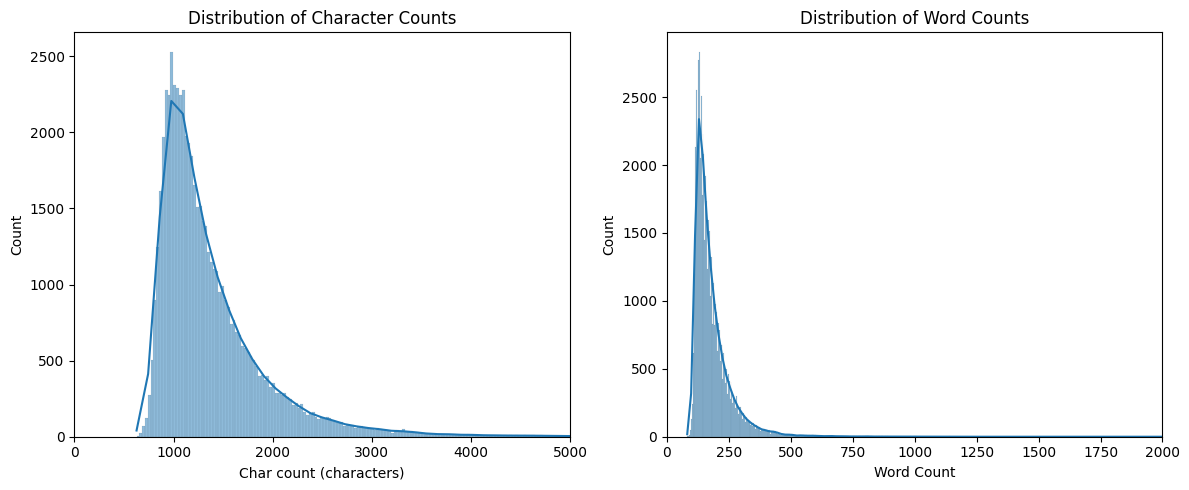

In [7]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(data['char_count'], kde=True)
plt.title('Distribution of Character Counts')
plt.xlabel('Char count (characters)')
plt.xlim(0, 5000)

plt.subplot(1, 2, 2)
sns.histplot(data['word_count'], kde=True)
plt.title('Distribution of Word Counts')
plt.xlabel('Word Count')
plt.xlim(0, 2000)

plt.tight_layout()
plt.show()

In [20]:
def plot_wordcloud(text):
    wordcloud = WordCloud(width=800, height=400, background_color='white',colormap='inferno').generate(text)
    plt.figure(figsize=(8, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title("Word Cloud for 'People_wiki' Dataset")
    plt.show()

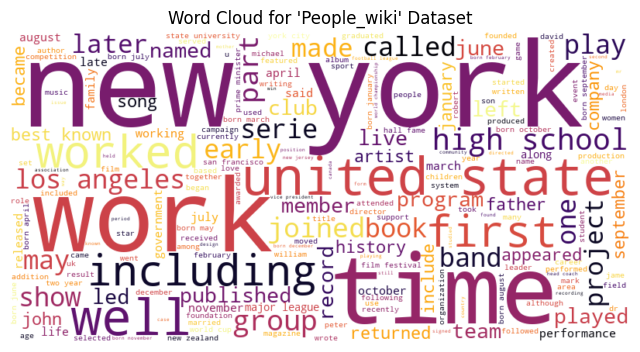

In [21]:
plot_wordcloud(" ".join(data['Clean_text'].tolist()))

In [13]:
def get_top_ngrams(text_data, n=1, top_k=10):
    text = " ".join(text_data)  # Combine all text into one string
    words = text.split()  # Tokenize words
    
    # Generate n-grams (unigram, bigram, trigram)
    n_grams = list(ngrams(words, n))
    
    # Count n-gram frequencies
    ngram_counts = Counter(n_grams)
    
    return ngram_counts.most_common(top_k)  # Return top K n-grams


def plot_top_ngrams(text_data, n=1, top_k=10):
    common_ngrams = get_top_ngrams(text_data, n=n, top_k=top_k)
    
    # Convert n-grams to string format for plotting
    ngram_labels, counts = zip(*[( " ".join(gram), count) for gram, count in common_ngrams])

    plt.figure(figsize=(8, 5))
    sns.barplot(x=list(counts), y=list(ngram_labels), palette="magma")
    plt.xlabel("Count")
    plt.ylabel(f"{'Unigrams' if n==1 else 'Bigrams' if n==2 else 'Trigrams'}")
    plt.title(f"Top {top_k} {'Unigrams' if n==1 else 'Bigrams' if n==2 else 'Trigrams'}")
    plt.show()

C:\Users\PCCV\AppData\Local\Temp\ipykernel_3572\2073728831.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(ngram_labels), palette="magma")


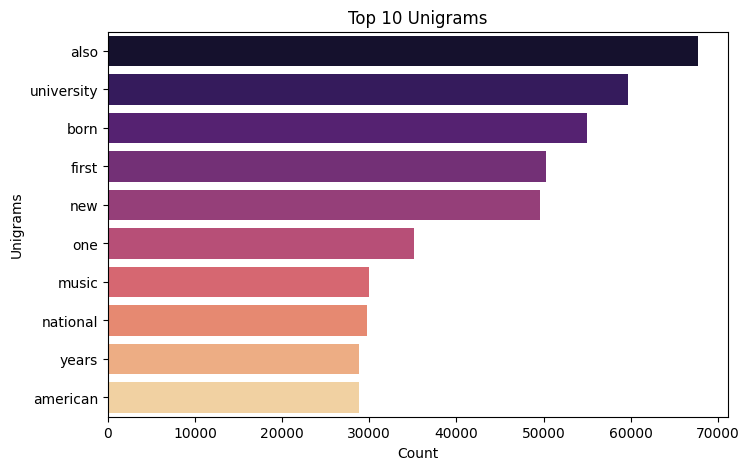

In [15]:
# Plot Top 10 Unigrams
plot_top_ngrams(data["Clean_text"], n=1, top_k=10)

C:\Users\PCCV\AppData\Local\Temp\ipykernel_3572\2073728831.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(ngram_labels), palette="magma")


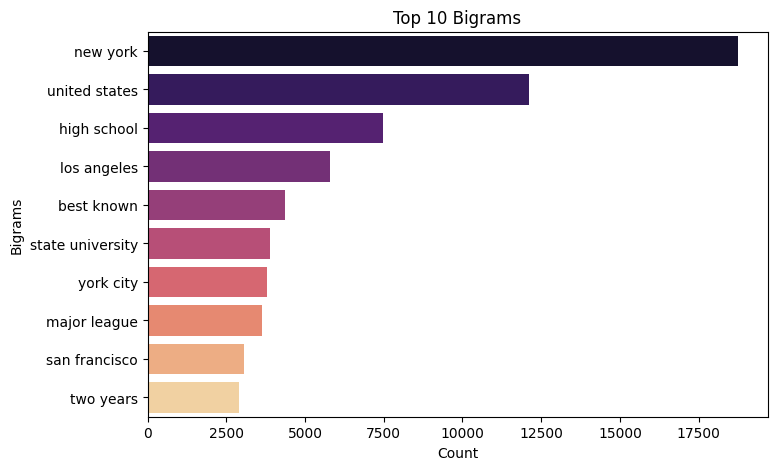

In [16]:
# Plot Top 10 Bigrams
plot_top_ngrams(data["Clean_text"], n=2, top_k=10)

C:\Users\PCCV\AppData\Local\Temp\ipykernel_3572\2073728831.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(ngram_labels), palette="magma")


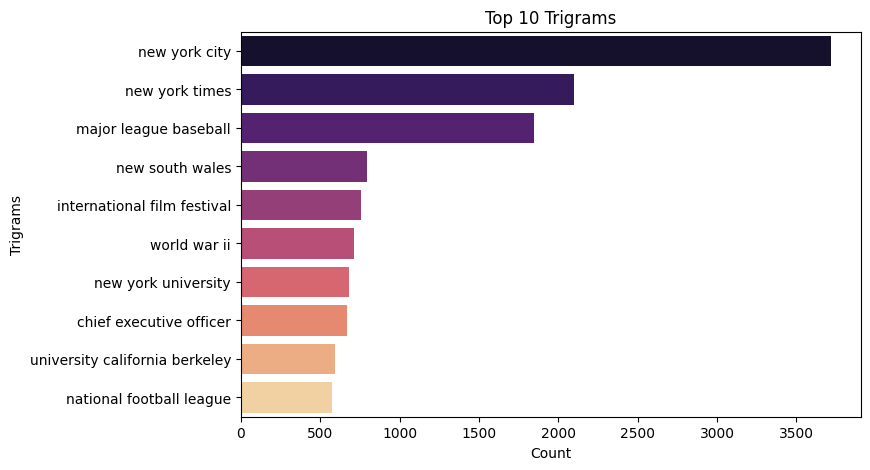

In [17]:
# Plot Top 10 Trigrams
plot_top_ngrams(data["Clean_text"], n=3, top_k=10)